In [2]:
!python3 -m pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 1.5 MB/s  0:00:07 1.4 MB/s eta 0:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] 1/2 [statsmodels]

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import levene


In [4]:
df = pd.read_csv("GymMembers.csv")
df.head()


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [5]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [7]:
df.columns



Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

In [8]:
summary = df.groupby("Experience_Level")["Water_Intake (liters)"].agg(["count","mean","std"])
print(summary)


                  count      mean       std
Experience_Level                           
1                   376  2.529787  0.585119
2                   406  2.482759  0.571503
3                   191  3.123037  0.400386


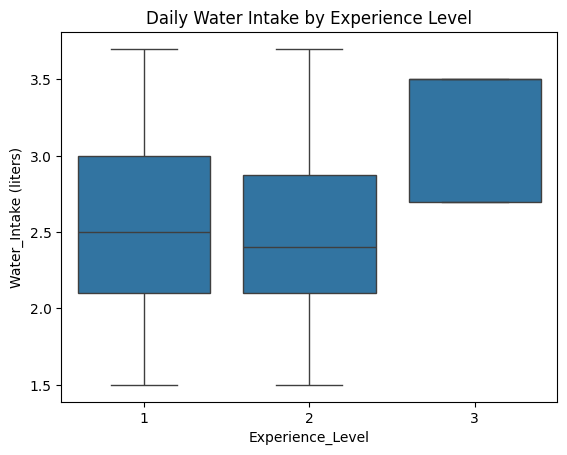

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Experience_Level", y="Water_Intake (liters)", data=df)
plt.title("Daily Water Intake by Experience Level")
plt.show()


In [12]:
from scipy.stats import f_oneway

groups = [group["Water_Intake (liters)"].values 
          for name, group in df.groupby("Experience_Level")]

F, p = f_oneway(*groups)

print("F-statistic:", F)
print("p-value:", p)


F-statistic: 98.28507937154069
p-value: 1.3568212698959679e-39


In [13]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(df["Water_Intake (liters)"],
                          df["Experience_Level"])

print(tukey)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   -0.047 0.4538 -0.1391  0.045  False
     1      3   0.5932    0.0   0.479 0.7075   True
     2      3   0.6403    0.0  0.5274 0.7531   True
---------------------------------------------------


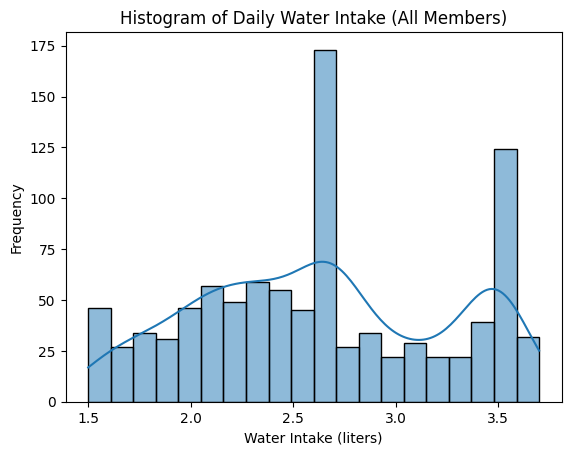

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.histplot(df["Water_Intake (liters)"], bins=20, kde=True)
plt.title("Histogram of Daily Water Intake (All Members)")
plt.xlabel("Water Intake (liters)")
plt.ylabel("Frequency")
plt.show()


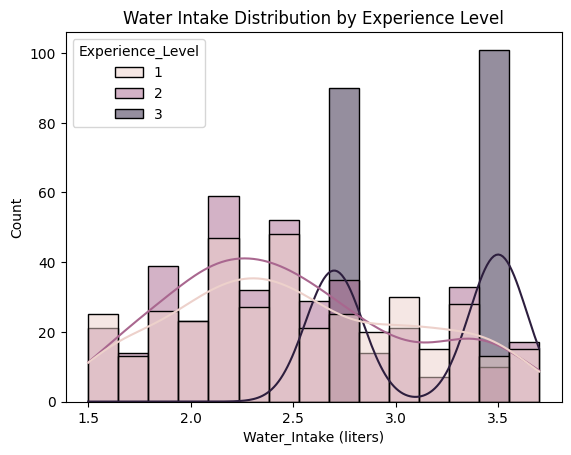

In [15]:
plt.figure()
sns.histplot(data=df, x="Water_Intake (liters)", hue="Experience_Level", bins=15, kde=True)
plt.title("Water Intake Distribution by Experience Level")
plt.show()


In [17]:
from scipy.stats import shapiro

for level in df["Experience_Level"].unique():
    group = df[df["Experience_Level"] == level]["Water_Intake (liters)"]
    stat, p = shapiro(group)
    print(f"Experience Level {level}: p-value = {p}")


Experience Level 3: p-value = 5.304383607896259e-20
Experience Level 2: p-value = 1.0806134814079217e-08
Experience Level 1: p-value = 1.0832995268132738e-07


In [18]:
from scipy.stats import levene

group1 = df[df["Experience_Level"] == 1]["Water_Intake (liters)"]
group2 = df[df["Experience_Level"] == 2]["Water_Intake (liters)"]
group3 = df[df["Experience_Level"] == 3]["Water_Intake (liters)"]

stat, p = levene(group1, group2, group3)

print("Levene’s test p-value:", p)


Levene’s test p-value: 0.0014449610546076776
